In [11]:
%pip install pandas
import pandas as pd
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv('../data/realtor-data.csv')

In [3]:
California = data[data['state'] == 'California']

In [4]:
California

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
160666,102093.0,for_sale,3.000000e+06,7.0,6.0,NaN,1760549.0,Balzola,California,0.0,6889.0,NaN
221994,23826.0,for_sale,2.147484e+09,2.0,2.0,0.12,11355.0,International,California,NaN,885.0,NaN
942507,98034.0,for_sale,1.000000e+07,NaN,NaN,123.97,NaN,Playa de Novillero,California,NaN,NaN,NaN
942510,16829.0,for_sale,3.280000e+05,3.0,3.0,NaN,915973.0,Quintana Roo,California,NaN,NaN,NaN
1154530,17458.0,for_sale,1.990000e+05,NaN,NaN,5.10,2937.0,Milford,California,96121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2177843,27315.0,sold,4.594000e+05,3.0,1.0,0.12,227460.0,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177844,93046.0,sold,9.480000e+05,6.0,6.0,NaN,380389.0,South Lake Tahoe,California,96150.0,3757.0,2022-03-07
2177849,84002.0,sold,8.500000e+05,4.0,3.0,0.14,1763021.0,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,31770.0,sold,9.590000e+05,4.0,3.0,0.21,183662.0,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


In [5]:
for column in California.columns:
    # Get the number of NaN values in the current column
    nan_count = California[column].isna().sum()
    if nan_count > 0:
        print(f"{column} has {nan_count} NaN values")


brokered_by has 651 NaN values
price has 33 NaN values
bed has 31069 NaN values
bath has 33073 NaN values
acre_lot has 22978 NaN values
street has 794 NaN values
city has 118 NaN values
zip_code has 21 NaN values
house_size has 29598 NaN values
prev_sold_date has 34197 NaN values


In [6]:
California = California.dropna()

In [7]:
California


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1208998,4311.0,for_sale,172999.0,3.0,2.0,0.16,987585.0,Blythe,California,92225.0,1132.0,1984-06-29
1209113,4311.0,for_sale,201000.0,2.0,2.0,0.34,761139.0,Blythe,California,92225.0,1100.0,1997-09-23
1209116,76008.0,for_sale,250000.0,7.0,3.0,0.19,1002149.0,Blythe,California,92225.0,3126.0,2015-09-23
1209118,86230.0,for_sale,325000.0,3.0,2.0,5.00,664584.0,Blythe,California,92225.0,1925.0,1985-01-14
1209120,22611.0,for_sale,287500.0,5.0,3.0,0.20,1230938.0,Blythe,California,92225.0,1642.0,2018-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2177842,79212.0,sold,525000.0,1.0,1.0,0.02,1063265.0,South Lake Tahoe,California,96150.0,607.0,2022-03-07
2177843,27315.0,sold,459400.0,3.0,1.0,0.12,227460.0,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177849,84002.0,sold,850000.0,4.0,3.0,0.14,1763021.0,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,31770.0,sold,959000.0,4.0,3.0,0.21,183662.0,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


In [8]:
for column in California.columns:
    # Get the number of NaN values in the current column
    nan_count = California[column].isna().sum()
    if nan_count > 0:
        print(f"{column} has {nan_count} NaN values")

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

def calculate_correlation(dataframe, target_column):
    # Select numerical columns and calculate correlation
    numerical_data = dataframe.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_data.corr()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.show()
    
    # Focus on correlations of features with the target
    target_correlation = correlation_matrix[target_column].sort_values(ascending=False)
    print("Correlations with the target variable:\n", target_correlation)
    
    # Scatter plots for the most correlated variables
    for col in numerical_data.columns:
        if col != target_column:
            dataframe.plot(kind='scatter', x=col, y=target_column, alpha=0.5)
            plt.title(f'Scatter plot of {target_column} vs {col}')
            plt.show()
    
    # For categorical data: One-Hot Encoding
    # Assuming 'status' is the only categorical column for simplicity
    if 'status' in dataframe.columns:
        one_hot_encoder = OneHotEncoder()
        status_encoded = one_hot_encoder.fit_transform(dataframe[['status']]).toarray()
        for i, category in enumerate(one_hot_encoder.categories_[0]):
            dataframe[category] = status_encoded[:, i]
    
    # Feature Importance with Random Forest
    if 'status' in dataframe.columns:
        X = dataframe.drop([target_column, 'status'], axis=1)
        X = pd.concat([X, pd.DataFrame(status_encoded, columns=one_hot_encoder.categories_[0])], axis=1)
    else:
        X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]
    
    # Fitting the model
    model = RandomForestRegressor()
    model.fit(X, y)
    
    # Getting the feature importance
    importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    importance = importance.sort_values(by='Importance', ascending=False)
    print("Feature Importances:\n", importance)
    
    return target_correlation, importance


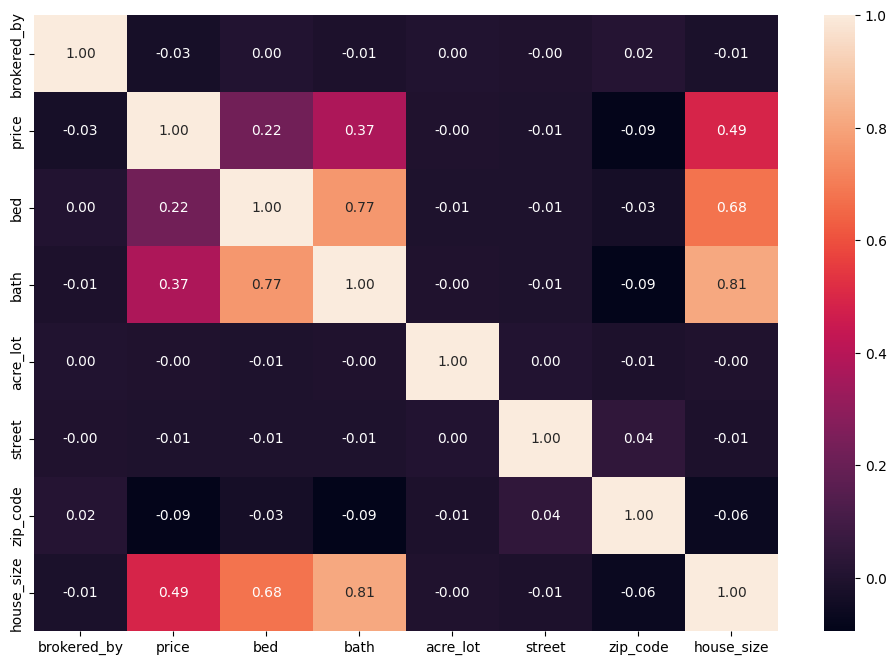

Correlations with the target variable:
 price          1.000000
house_size     0.489352
bath           0.374790
bed            0.222524
acre_lot      -0.001889
street        -0.008243
brokered_by   -0.026809
zip_code      -0.089278
Name: price, dtype: float64


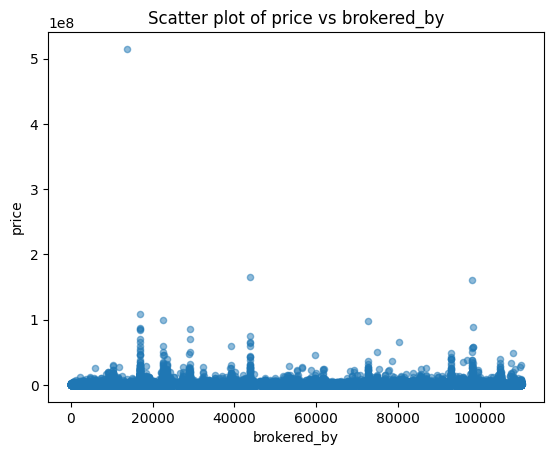

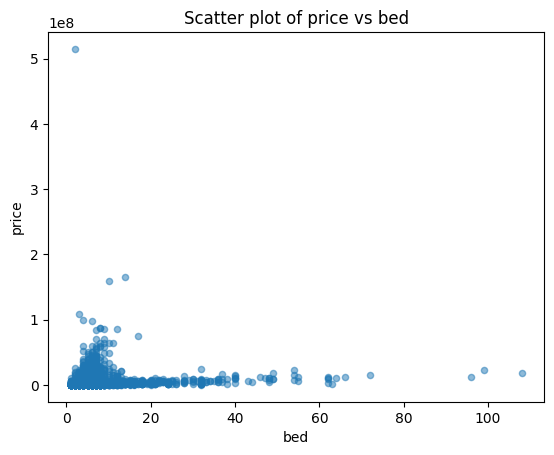

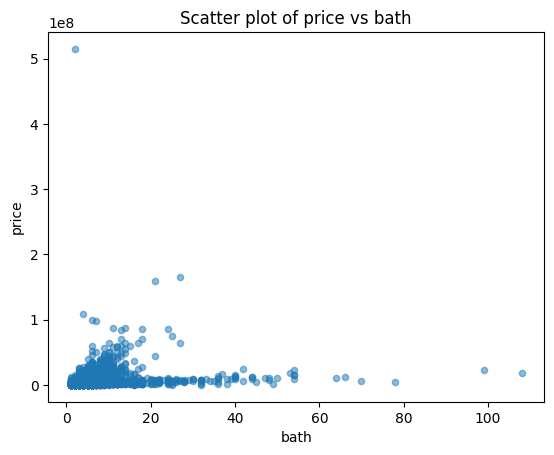

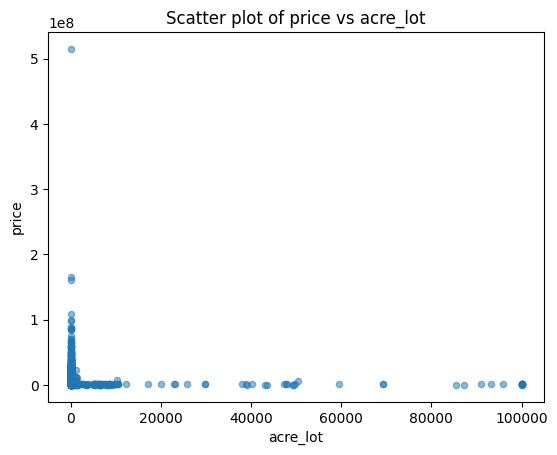

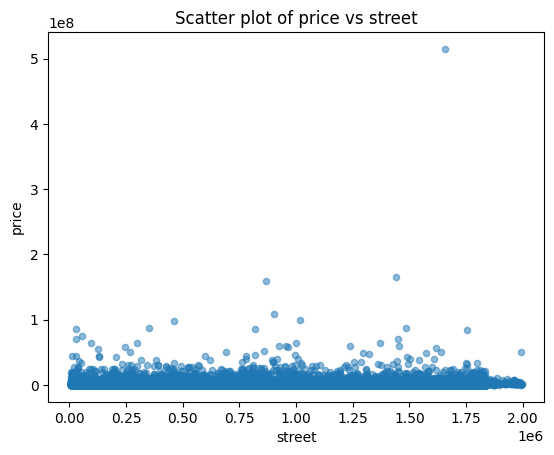

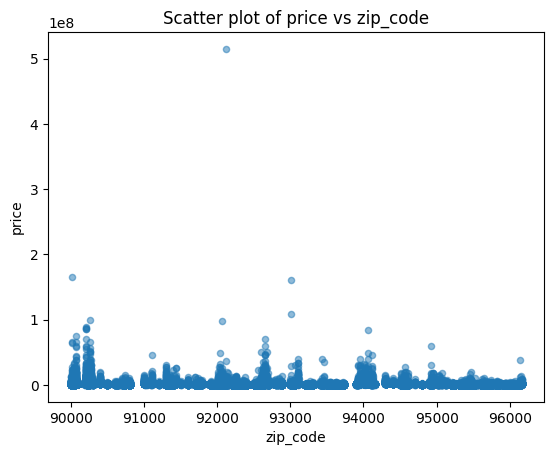

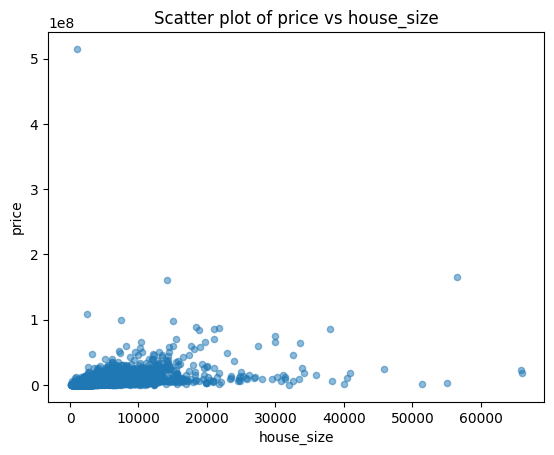

Feature Importances:
        Feature  Importance
6   house_size    0.369693
0  brokered_by    0.227096
5     zip_code    0.149101
3     acre_lot    0.086720
2         bath    0.057922
4       street    0.056627
1          bed    0.052840


In [12]:
# Drop non-numeric columns
California_numeric = California.select_dtypes(include=[np.number])

# Now call the function using the numeric dataframe and 'price' as the target column
correlation_results, feature_importance_results = calculate_correlation(California_numeric, 'price')


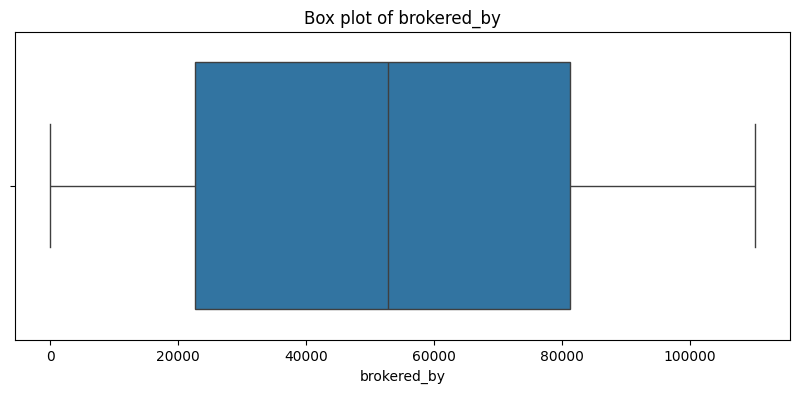

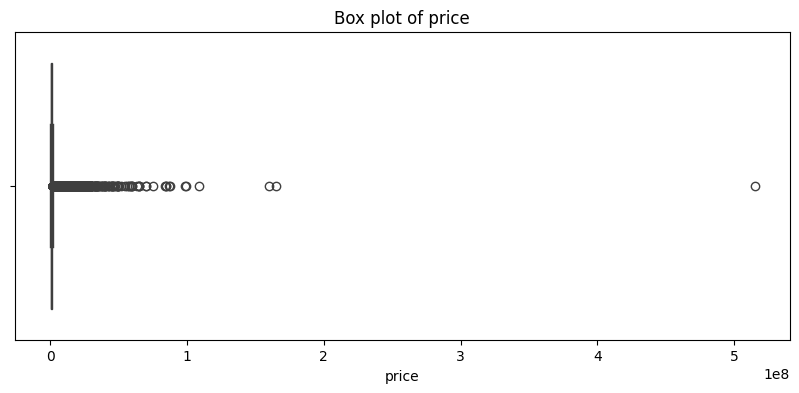

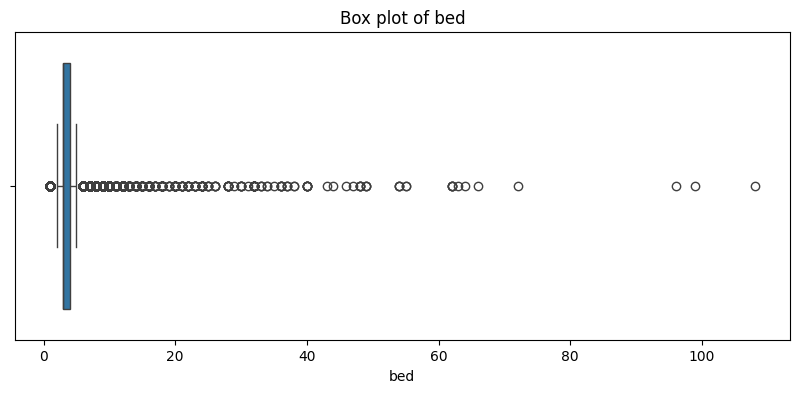

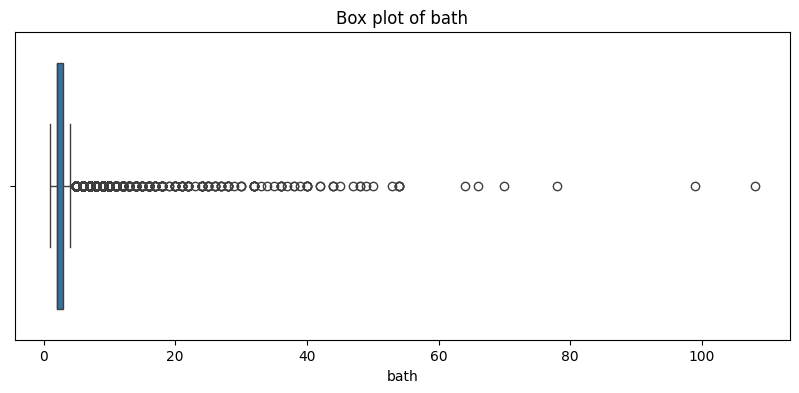

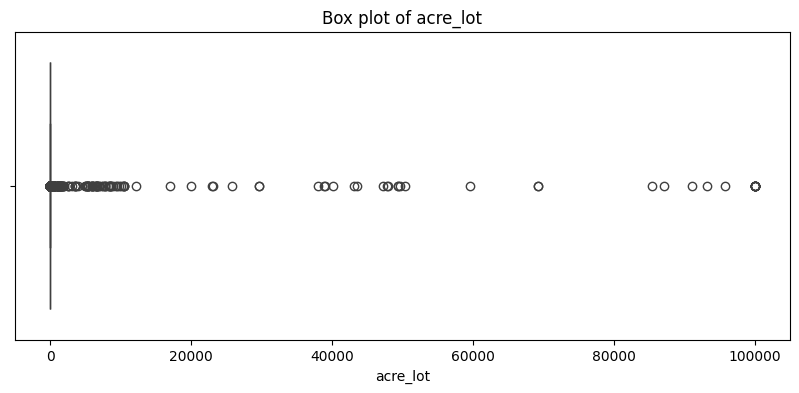

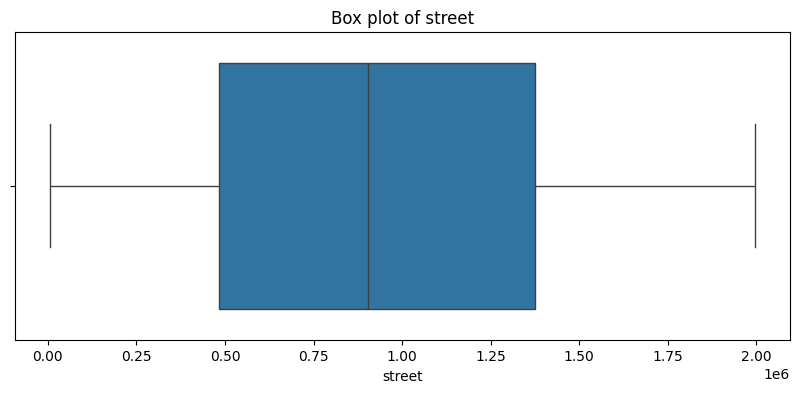

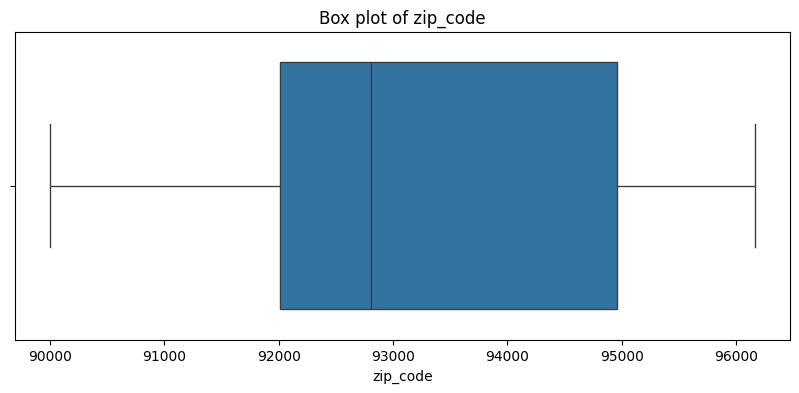

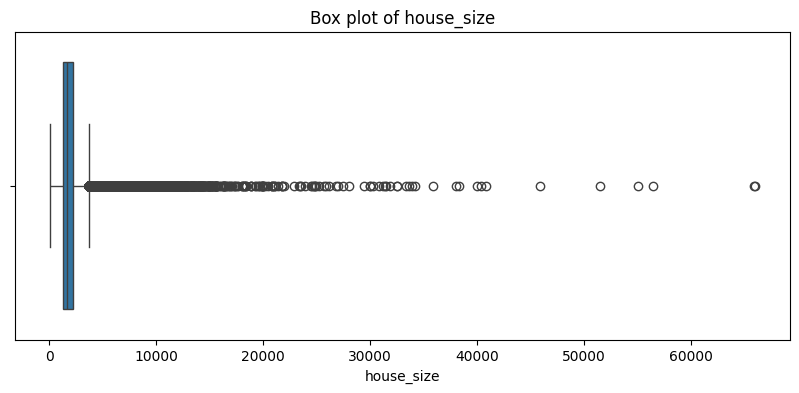

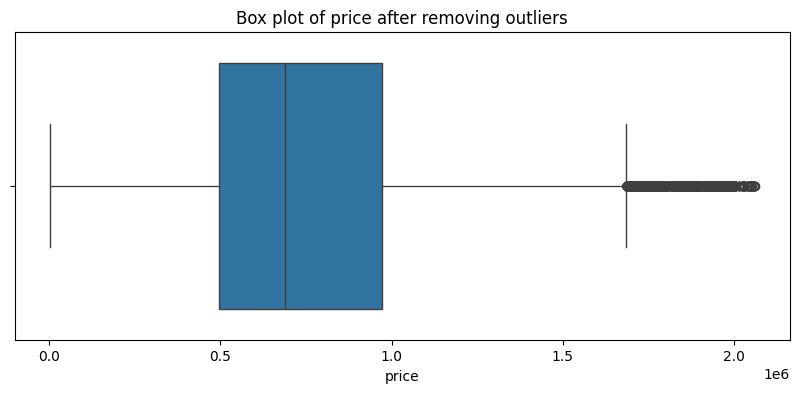

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Visualizing with Box Plots
# Plotting boxplots for all numeric features
for column in California_numeric.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=California_numeric[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Step 2: Identifying Outliers
# This is typically done during analysis, for example:
Q1 = California_numeric['price'].quantile(0.25)
Q3 = California_numeric['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

# Step 3: Removing Outliers
# You can remove outliers based on the threshold calculated above
filtered_df = California_numeric[(California_numeric['price'] > outlier_threshold_low) & (California_numeric['price'] < outlier_threshold_high)]

# Step 4: Re-assessing the Data
# Plot the box plot for 'price' again to see if outliers have been reduced
plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered_df['price'])
plt.title('Box plot of price after removing outliers')
plt.show()


In [ ]:
def remove_outliers(df, threshold=1.5):
    # The dataframe to return, without outliers
    filtered_df = df.copy()
    
    # For each column in the dataframe
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile of the data) for the given column
        Q1 = df[column].quantile(0.25)
        # Calculate Q3 (75th percentile of the data) for the given column
        Q3 = df[column].quantile(0.75)
        # Calculate the IQR (interquartile range) for the given column
        IQR = Q3 - Q1
        
        # Define the range of acceptable data as 1.5 times the IQR above Q3 and below Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        
        # Filter out outliers and retain only the rows that fall within the acceptable range
        filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return filtered_df

# Remove outliers from the dataframe and create a new dataframe
# Now South_Lake_Tahoe_no_outliers will have no outliers based on the 1.5 IQR rule for all numeric columns


In [ ]:
California = remove_outliers(California_numeric)


/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/

In [ ]:
California

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
1208998,4311.0,172999.0,3.0,2.0,0.16,987585.0,92225.0,1132.0
1209113,4311.0,201000.0,2.0,2.0,0.34,761139.0,92225.0,1100.0
1209120,22611.0,287500.0,5.0,3.0,0.20,1230938.0,92225.0,1642.0
1209121,51500.0,129000.0,3.0,1.0,0.17,513402.0,92225.0,825.0
1209122,86230.0,144549.0,3.0,1.0,0.29,994271.0,92225.0,1092.0
...,...,...,...,...,...,...,...,...
2177841,56276.0,699000.0,4.0,2.0,0.20,559701.0,96150.0,1760.0
2177843,27315.0,459400.0,3.0,1.0,0.12,227460.0,96150.0,1160.0
2177849,84002.0,850000.0,4.0,3.0,0.14,1763021.0,96150.0,1956.0
2177857,31770.0,959000.0,4.0,3.0,0.21,183662.0,96150.0,1824.0


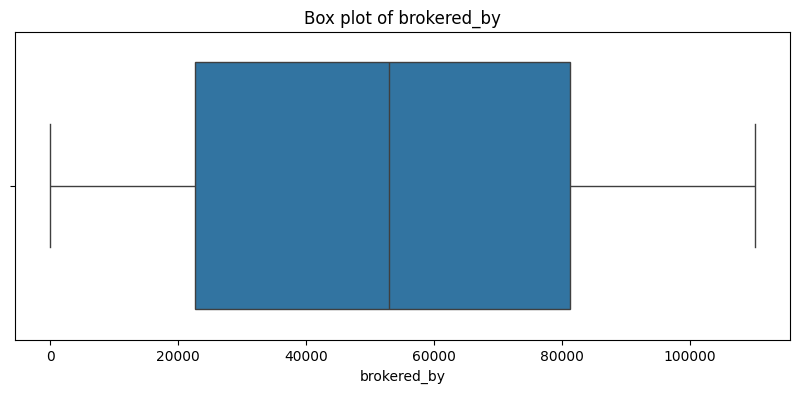

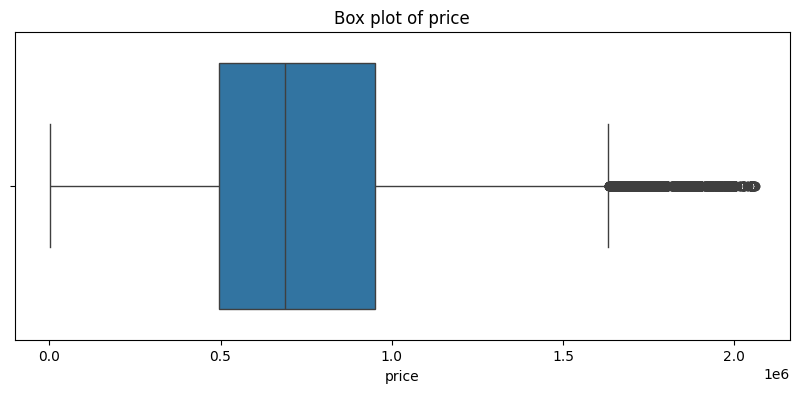

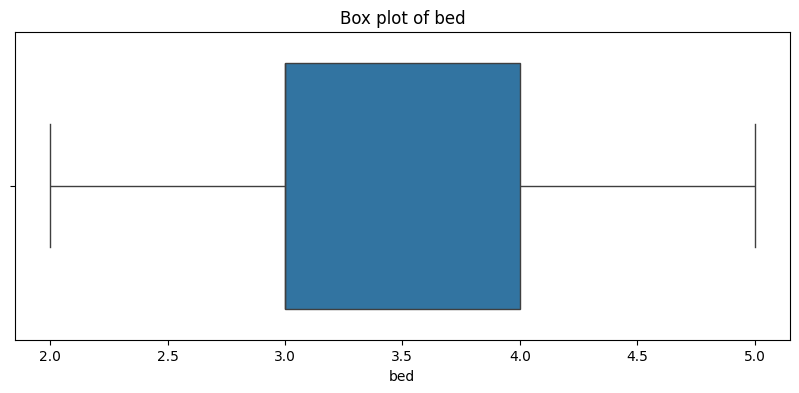

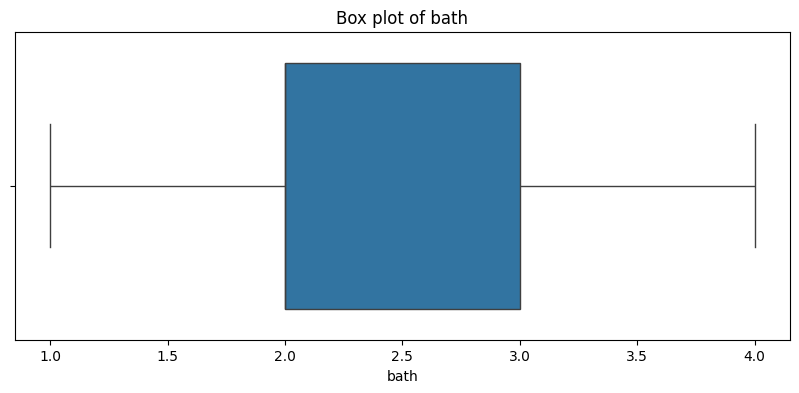

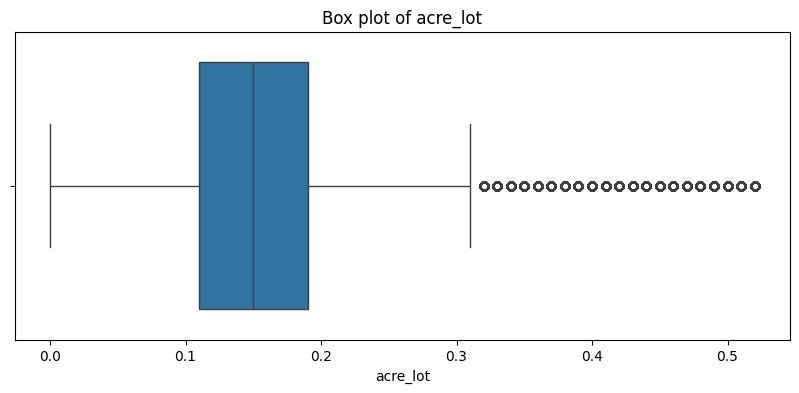

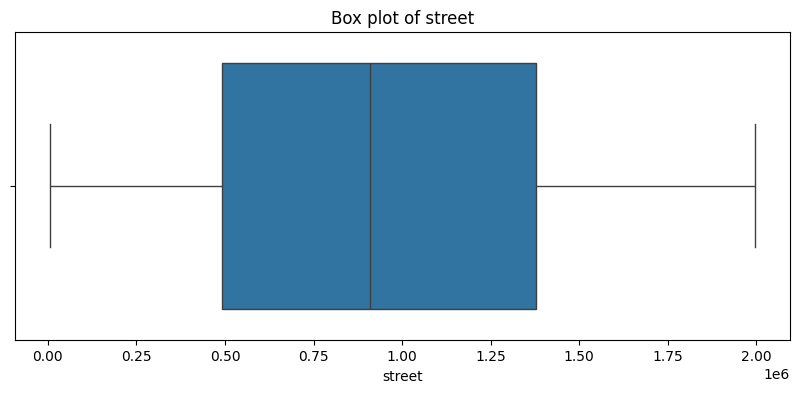

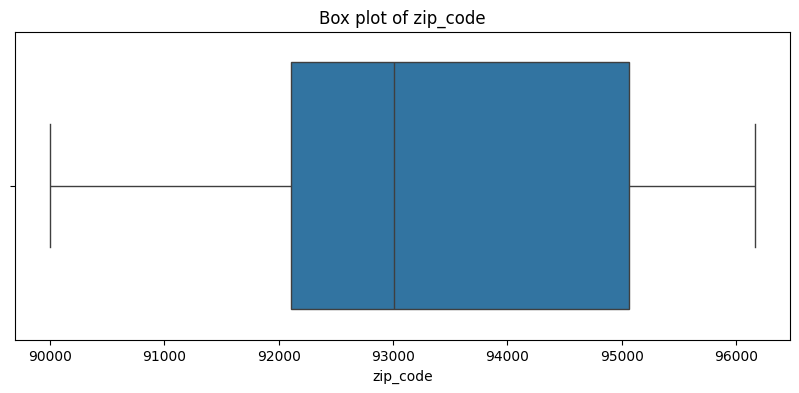

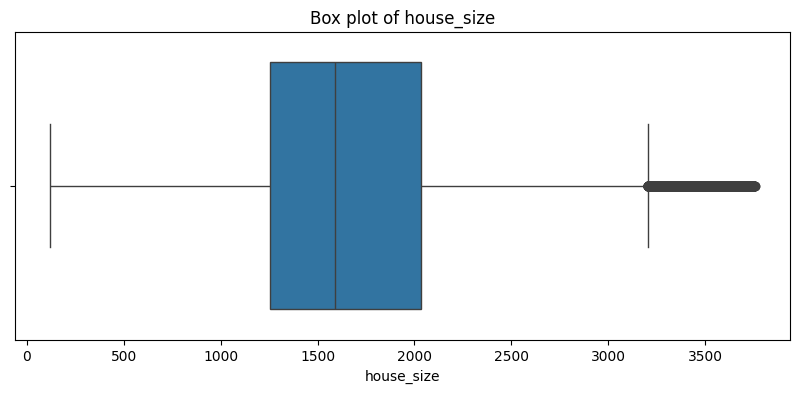

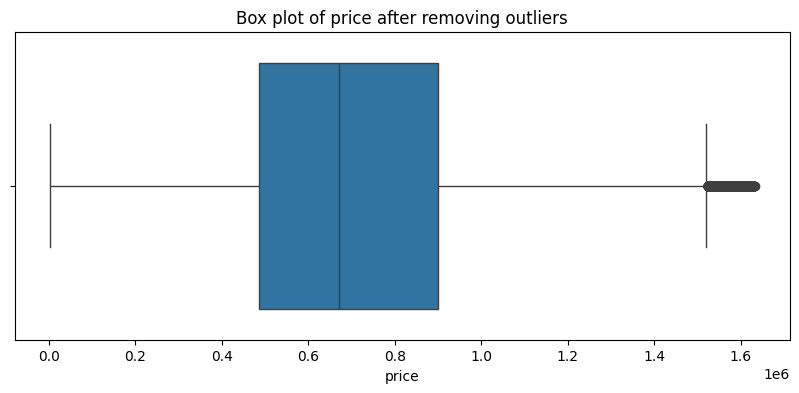

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Visualizing with Box Plots
# Plotting boxplots for all numeric features
for column in California.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=California[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Step 2: Identifying Outliers
# This is typically done during analysis, for example:
Q1 = California['price'].quantile(0.25)
Q3 = California['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

# Step 3: Removing Outliers
# You can remove outliers based on the threshold calculated above
filtered_df = California[(California['price'] > outlier_threshold_low) & (California['price'] < outlier_threshold_high)]

# Step 4: Re-assessing the Data
# Plot the box plot for 'price' again to see if outliers have been reduced
plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered_df['price'])
plt.title('Box plot of price after removing outliers')
plt.show()


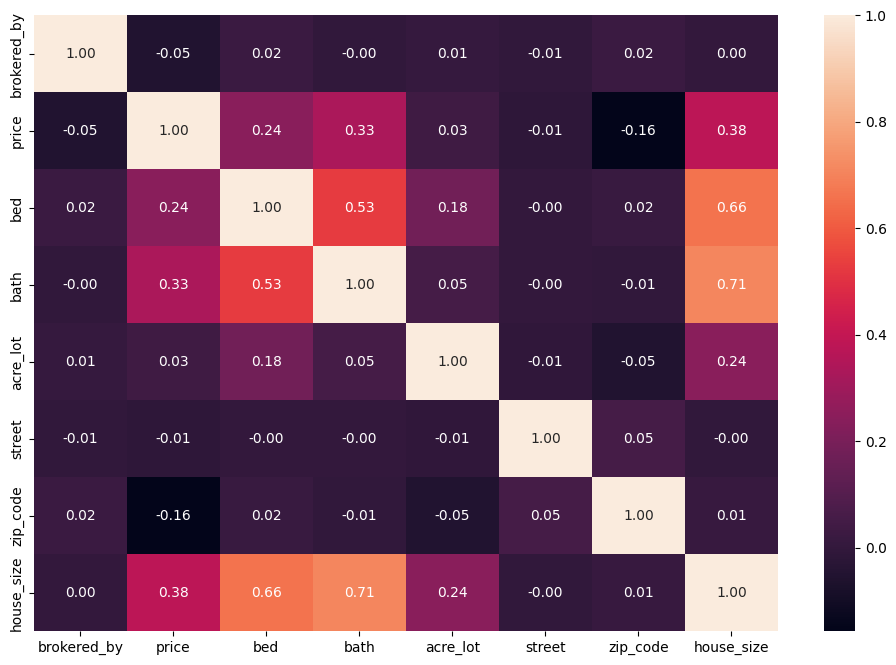

Correlations with the target variable:
 price          1.000000
house_size     0.377979
bath           0.331357
bed            0.244906
acre_lot       0.033684
street        -0.013104
brokered_by   -0.054843
zip_code      -0.157064
Name: price, dtype: float64


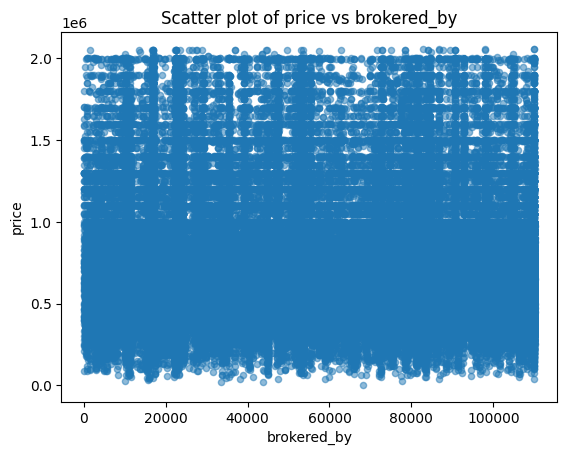

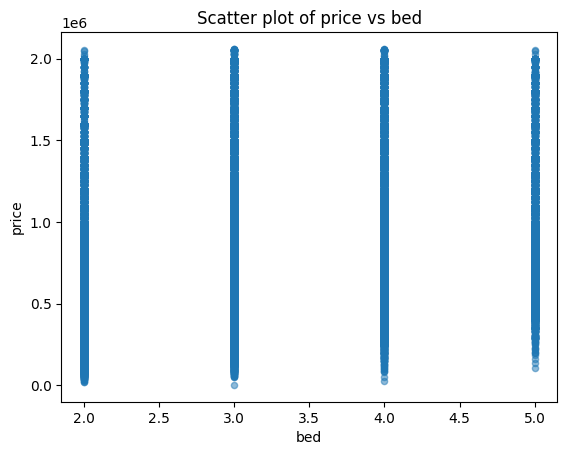

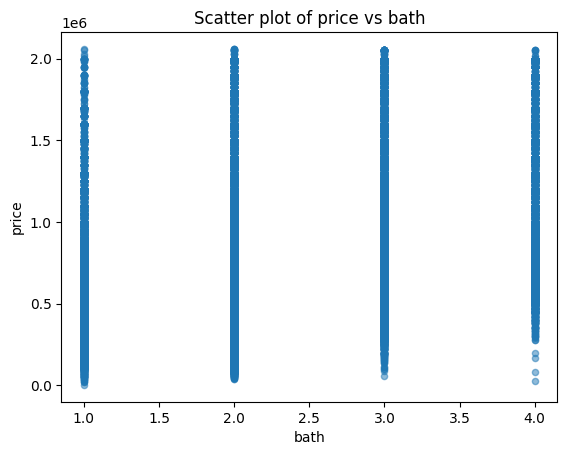

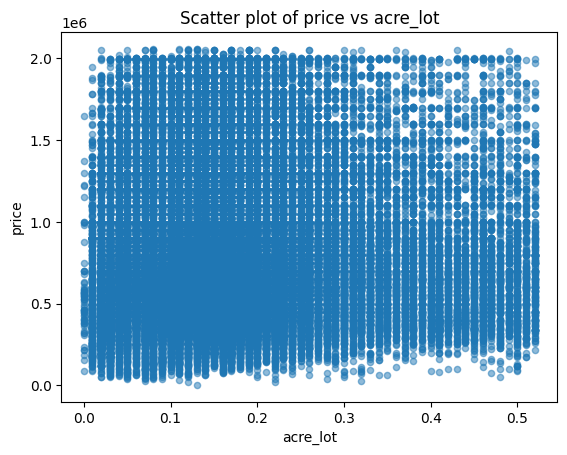

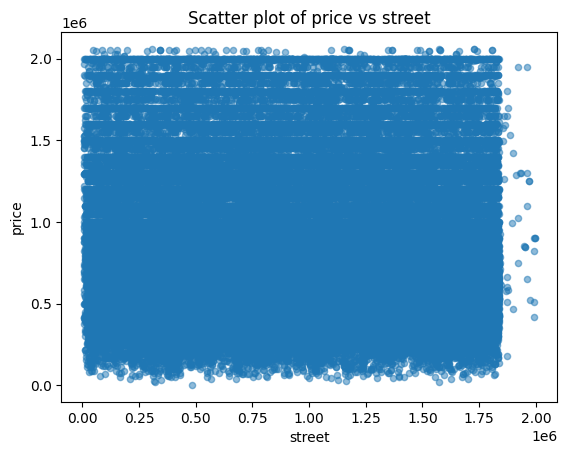

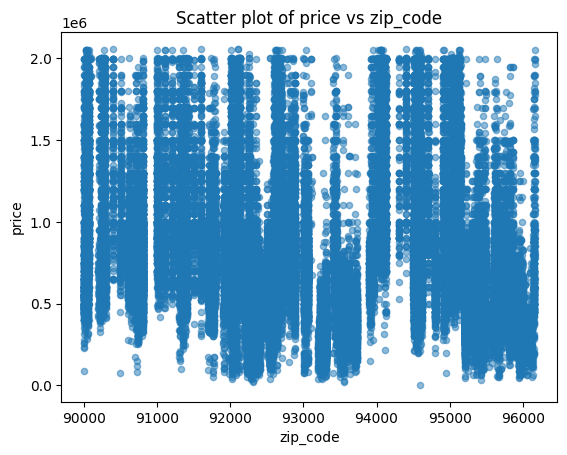

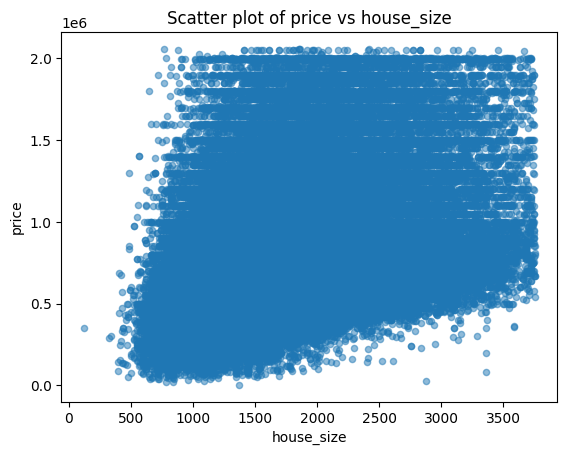

Feature Importances:
        Feature  Importance
5     zip_code    0.641043
6   house_size    0.208751
3     acre_lot    0.055569
4       street    0.042756
0  brokered_by    0.029673
1          bed    0.013012
2         bath    0.009196


In [ ]:

# Now call the function using the numeric dataframe and 'price' as the target column
correlation_results, feature_importance_results = calculate_correlation(California, 'price')

In [ ]:
California_original = data[data['state'] == 'California']

In [ ]:
California_original

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
160666,102093.0,for_sale,3.000000e+06,7.0,6.0,NaN,1760549.0,Balzola,California,0.0,6889.0,NaN
221994,23826.0,for_sale,2.147484e+09,2.0,2.0,0.12,11355.0,International,California,NaN,885.0,NaN
942507,98034.0,for_sale,1.000000e+07,NaN,NaN,123.97,NaN,Playa de Novillero,California,NaN,NaN,NaN
942510,16829.0,for_sale,3.280000e+05,3.0,3.0,NaN,915973.0,Quintana Roo,California,NaN,NaN,NaN
1154530,17458.0,for_sale,1.990000e+05,NaN,NaN,5.10,2937.0,Milford,California,96121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2177843,27315.0,sold,4.594000e+05,3.0,1.0,0.12,227460.0,South Lake Tahoe,California,96150.0,1160.0,2022-03-07
2177844,93046.0,sold,9.480000e+05,6.0,6.0,NaN,380389.0,South Lake Tahoe,California,96150.0,3757.0,2022-03-07
2177849,84002.0,sold,8.500000e+05,4.0,3.0,0.14,1763021.0,South Lake Tahoe,California,96150.0,1956.0,2022-04-22
2177857,31770.0,sold,9.590000e+05,4.0,3.0,0.21,183662.0,South Lake Tahoe,California,96150.0,1824.0,2021-11-23


In [ ]:
import pandas as pd

# Let's say you have a list of city names
cities_to_include = ['Alameda', 'El Cerrito',	'Mountain View',	'San Leandro',
'Albany',	'Emeryville',	'Napa',	'San Mateo',
'American', 'Canyon',	'Fairfax',	'Newark', 'San Pablo'
'Antioch',	'Fairfield',	'Novato',	'San Rafael',
'Atherton',	'Foster City',	'Oakland',	'San Ramon',
'Belmont',	'Fremont',	'Oakley',	'Santa Clara',
'Belvedere',	'Gilroy',	'Orinda',	'Santa Rosa',
'Benicia'	,'Half Moon Bay',	'Pacifica',	'Saratoga',
'Berkeley',	'Hayward',	'Palo Alto',	'Sausalito',
'Brentwood',	'Healdsburg',	'Petaluma',	'Sebastopol',
'Brisbane',	'Hercules',	'Piedmont',	'Sonoma',
'Burlingame',	'Hillsborough',	'Pinole',	'South San Francisco',
'Calistoga',	'Lafayette',	'Pittsburg',	'St. Helena',
'Campbell',	'Larkspur',	'Pleasant Hill',	'Suisun City',
'Clayton',	'Livermore',	'Pleasanton',	'Sunnyvale',
'Cloverdale',	'Los Altos',	'Portola Valley',	'Tiburon'
'Colma',	'Los Altos Hills',	'Redwood City',	'Union City',
'Concord',	'Los Gatos',	'Richmond',	'Vacaville',
'Corte Madera',	'Martinez',	'Rio Vista',	'Vallejo',
'Cotati',	'Menlo Park',	'Rohnert Park',	'Walnut Creek',
'Cupertino',	'Mill Valley','Ross','Windsor',
'Daly City',	'Millbrae',	'San Anselmo'	,'Woodside',
'Danville',	'Milpitas',	'San Bruno',	'Yountville',
'Dixon',	'Monte Sereno',	'San Carlos',	 
'Dublin',	'Moraga',	'San Francisco',	 
'East Palo Alto',	'Morgan Hill',	'San Jose']  # replace with actual city names

# Your original DataFrame is assumed to be named 'original_df'
# Initialize an empty DataFrame to store concatenated rows
Bay_Area = pd.DataFrame()

for city in cities_to_include:
    # Filter the rows where the city column is equal to the current city
    city_df = California_original[California_original['city'].isin([city])]
    # Concatenate the filtered rows into the larger DataFrame
    Bay_Area = pd.concat([Bay_Area, city_df], ignore_index=True)

# Now 'concatenated_df' contains all rows from 'original_df' where the city is in 'cities_to_include'


In [ ]:
Bay_Area

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,19788.0,for_sale,1500000.0,4.0,2.0,0.08,574552.0,Alameda,California,94501.0,1617.0,2007-06-15
1,53016.0,for_sale,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,California,94501.0,2510.0,2015-06-30
2,75693.0,for_sale,475000.0,1.0,1.0,0.85,294964.0,Alameda,California,94501.0,701.0,2003-06-18
3,7755.0,for_sale,725000.0,2.0,2.0,5.68,658407.0,Alameda,California,94501.0,1015.0,NaN
4,53016.0,for_sale,998000.0,3.0,1.0,0.11,100162.0,Alameda,California,94501.0,1037.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
39725,72764.0,sold,998000.0,3.0,3.0,0.04,164572.0,San Jose,California,95125.0,1260.0,2022-04-01
39726,16829.0,sold,2599000.0,6.0,4.0,0.21,278550.0,San Jose,California,95125.0,3141.0,2022-04-14
39727,109978.0,sold,3750000.0,4.0,4.0,0.40,429848.0,San Jose,California,95125.0,4109.0,2022-04-12
39728,16829.0,sold,1399000.0,3.0,2.0,0.14,513313.0,San Jose,California,95124.0,1320.0,2022-02-02


In [ ]:
Bay_Area = Bay_Area.dropna()

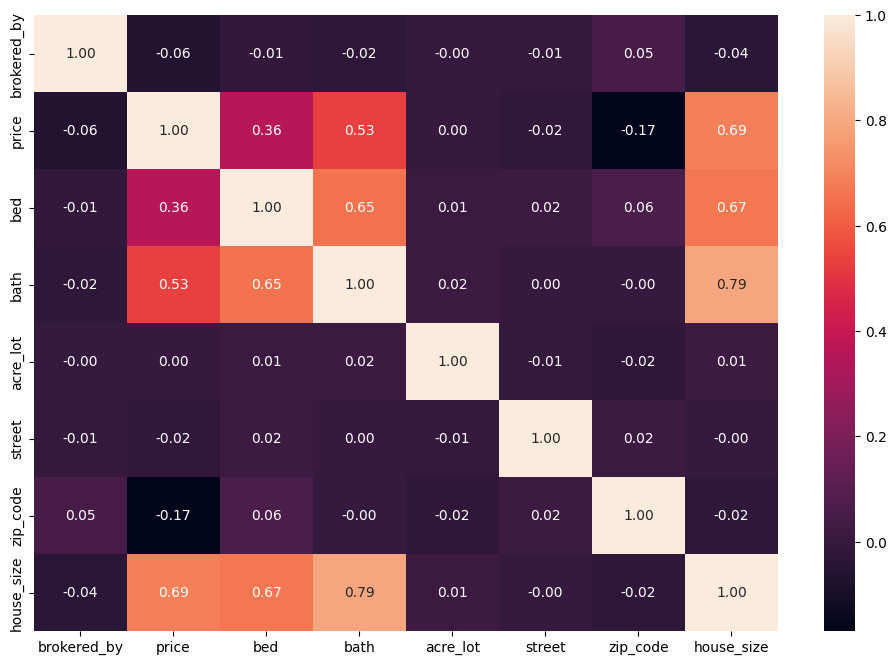

Correlations with the target variable:
 price          1.000000
house_size     0.686321
bath           0.530759
bed            0.357148
acre_lot       0.002706
street        -0.017791
brokered_by   -0.064776
zip_code      -0.169954
Name: price, dtype: float64


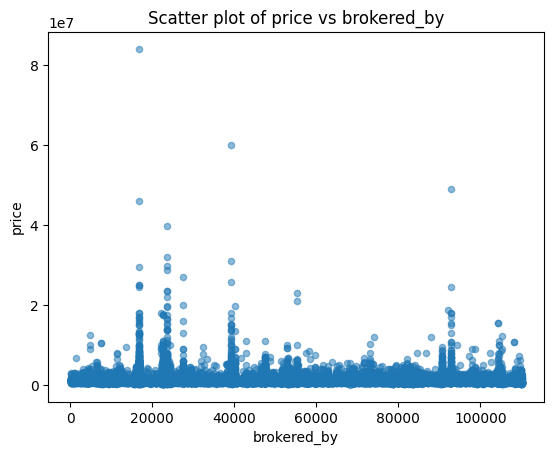

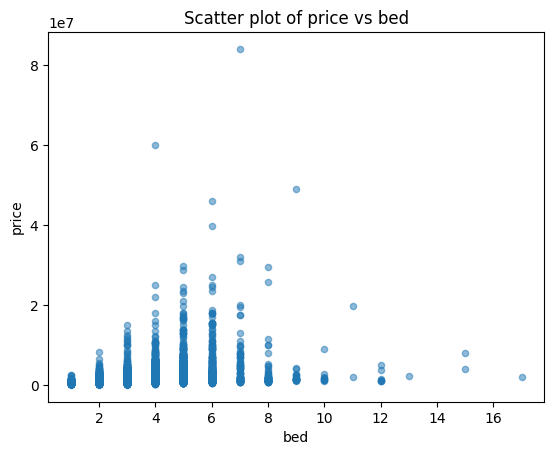

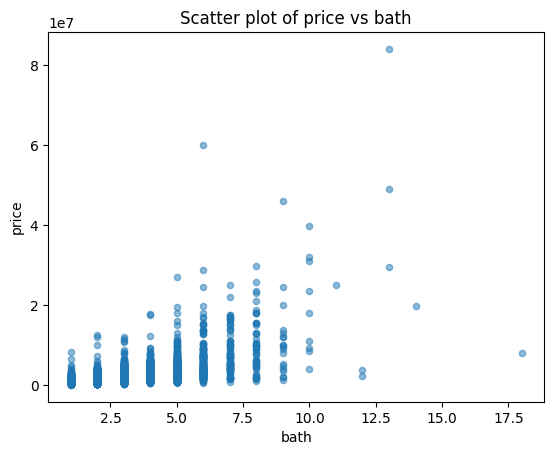

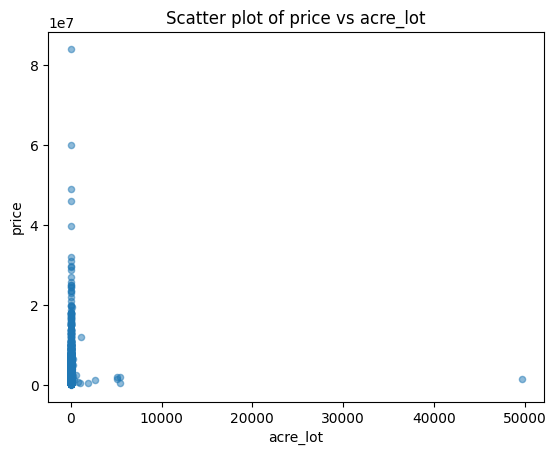

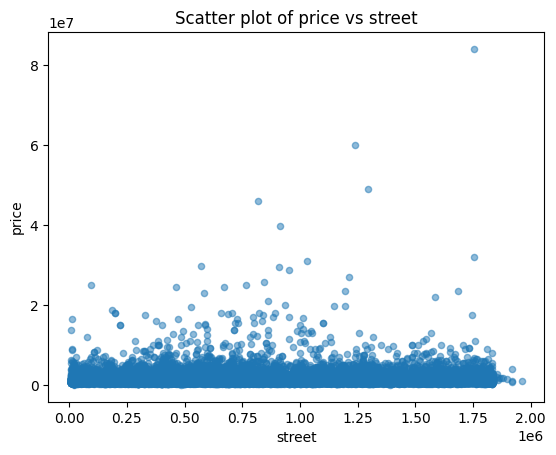

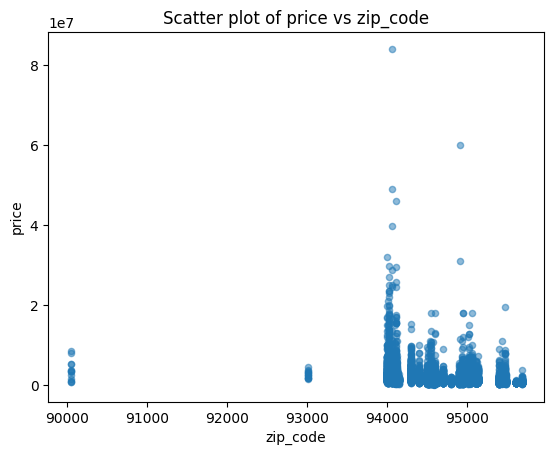

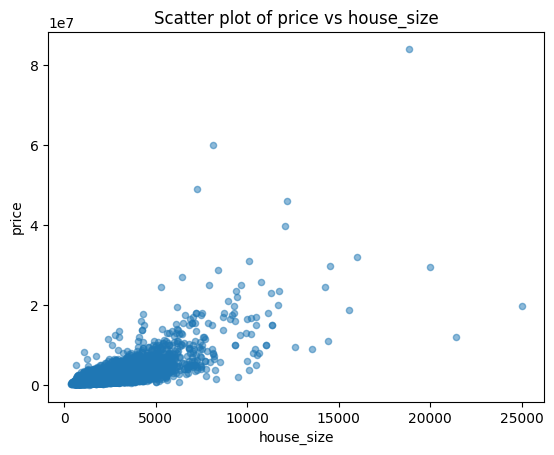

Feature Importances:
        Feature  Importance
6   house_size    0.599871
5     zip_code    0.166014
3     acre_lot    0.071727
2         bath    0.058099
4       street    0.049538
0  brokered_by    0.032878
1          bed    0.021873


In [ ]:
Bay_Area_numeric = Bay_Area.select_dtypes(include=[np.number])

# Now call the function using the numeric dataframe and 'price' as the target column
correlation_results, feature_importance_results = calculate_correlation(Bay_Area_numeric, 'price')

/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/ycl0fys12wq90tgn83r138pw0000gn/T/ipykernel_51662/3773852686.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
/var/folders/8d/

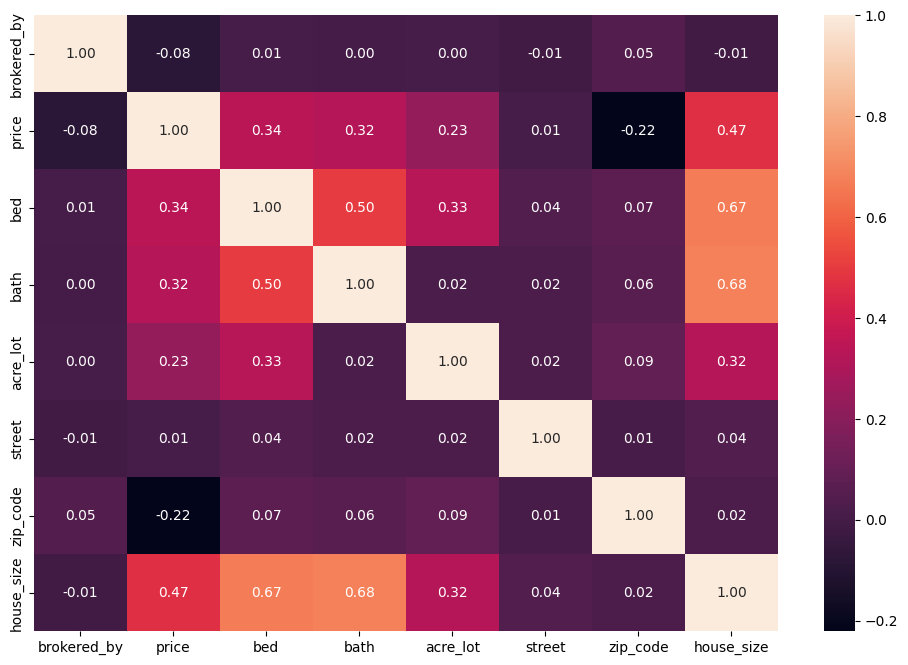

Correlations with the target variable:
 price          1.000000
house_size     0.470215
bed            0.337122
bath           0.322311
acre_lot       0.234622
street         0.005495
brokered_by   -0.084954
zip_code      -0.221051
Name: price, dtype: float64


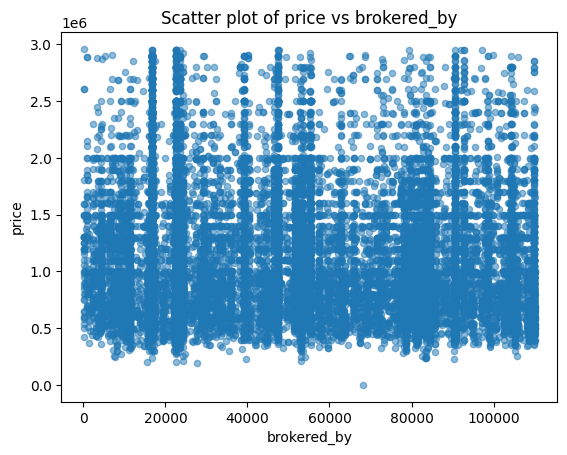

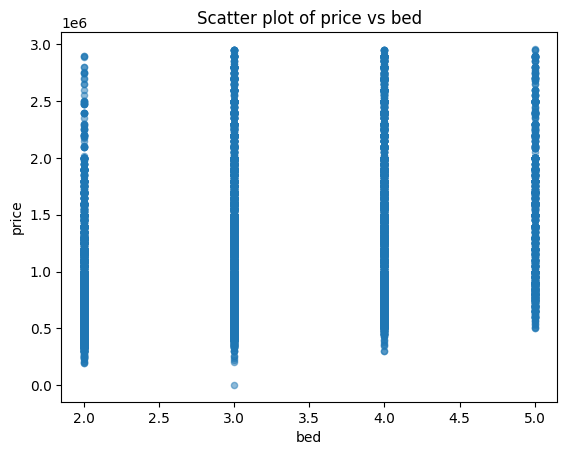

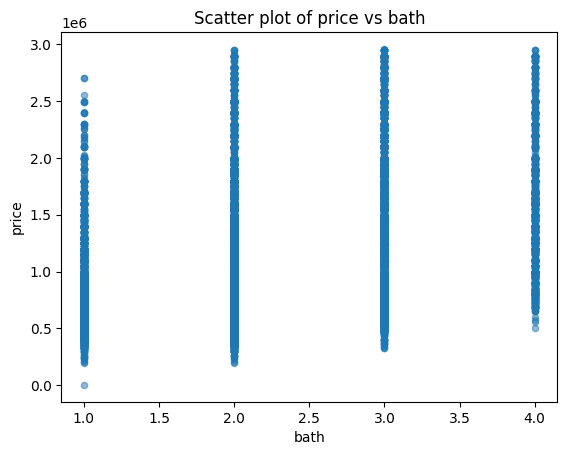

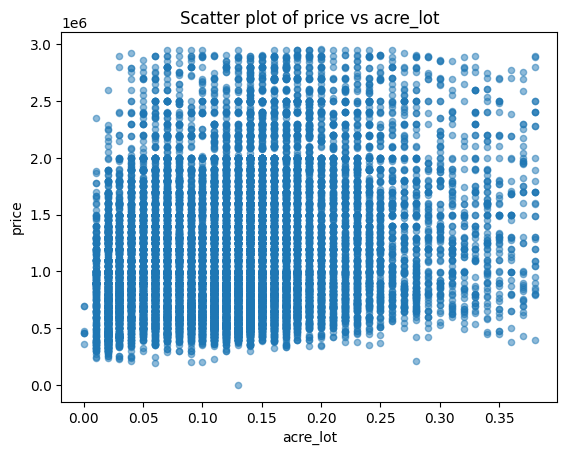

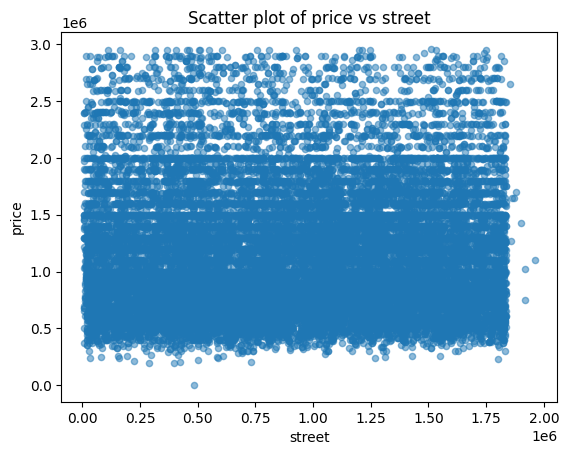

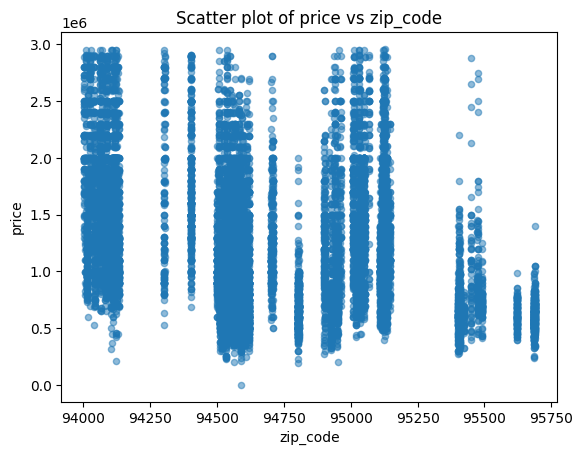

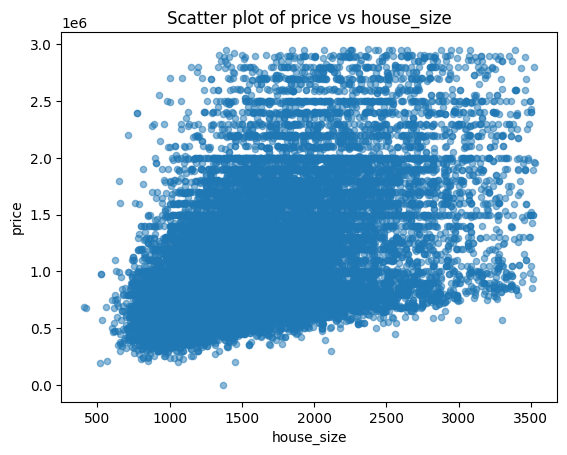

Feature Importances:
        Feature  Importance
5     zip_code    0.488447
6   house_size    0.292689
3     acre_lot    0.098827
4       street    0.060643
0  brokered_by    0.036532
1          bed    0.012420
2         bath    0.010442


In [ ]:
Bay_Area_cleaned = remove_outliers(Bay_Area_numeric)

correlation_results, feature_importance_results = calculate_correlation(Bay_Area_cleaned, 'price')
